### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

This is text for the project.

    1. notes 
    2. notes

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import plotly as ply
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
users  = pd.read_csv('user.csv') # Import the dataset named 'user.csv'
users.head()  # view the first 5 rows of the data

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
movies  = pd.read_csv('item.csv') # Import the dataset named 'item.csv'
movies.head()  # view the first 5 rows of the data

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
ratings  = pd.read_csv('data.csv') # Import the dataset named 'data.csv'
ratings.head()  # view the first 5 rows of the data

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [6]:
users.shape

(943, 5)

In [7]:
users.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [8]:
users.isnull().any().any()

False

In [9]:
users.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [11]:
movies.shape

(1681, 22)

In [12]:
movies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
movies.isnull().any().any()

False

In [14]:
movies.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [16]:
ratings.shape

(100000, 4)

In [17]:
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [18]:
ratings.isnull().any().any()

False

In [19]:
ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [20]:
# use sum on the default axis

movies.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [21]:
#hint: use sum on the axis = 1
movies.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [22]:
movies2=movies.copy()
columnList=list(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
movies2["sum"]=movies2[columnList].sum(axis=1)
#print(movies)
indexNames=movies2[movies2['sum']<2].index
#print(indexNames)
movies2.drop(indexNames,inplace=True)
print(movies2['movie title'])

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [23]:
movies.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [24]:
indexNames=movies[movies['unknown']==1].index
print(indexNames)
movies.drop(indexNames,inplace=True)
#confirm no more unknowns
movies.sum()

Int64Index([1371], dtype='int64')


movie id                                                  1413763
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         0
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [25]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [26]:
users.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [27]:
ratings.columns

Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object')

In [28]:
movies.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

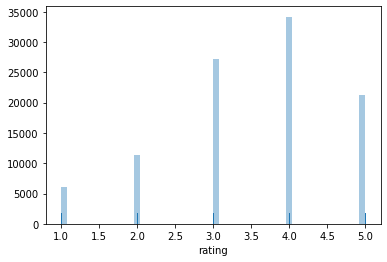

In [29]:
#displot ratings
sns.distplot(ratings['rating'], kde=False, rug=True);

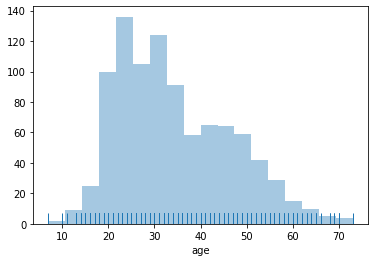

In [30]:
#distplot age
sns.distplot(users['age'], kde=False, rug=True);

0       01-Jan-1995
1       01-Jan-1995
2       01-Jan-1995
3       01-Jan-1995
4       01-Jan-1995
           ...     
1676    06-Feb-1998
1677    06-Feb-1998
1678    01-Jan-1998
1679    01-Jan-1994
1680    08-Mar-1996
Name: release date, Length: 1680, dtype: object
0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: year, Length: 1680, dtype: object


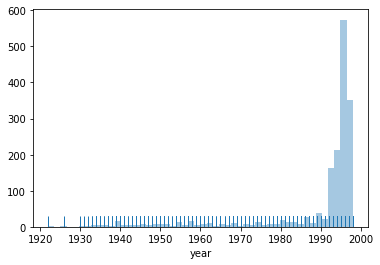

In [31]:
#distplot release year
print(movies['release date'])

#movies['relyr']=movies[movies['release date']].split("-")[3]
#print(movies['relyr'])

movies[['day','month','year']] = movies['release date'].apply(lambda x: pd.Series(str(x).split("-")))
print(movies['year'])
sns.distplot(movies['year'], kde=False, rug=True);

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object


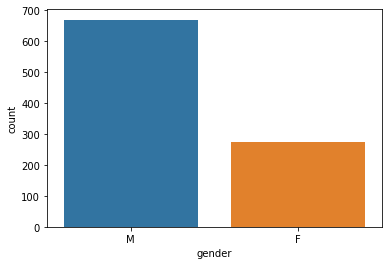

In [32]:
#distplot gender
print(users['gender'])

sns.countplot(users['gender'])
#sns.distplot(users['gender'], kde=False, rug=True);

0         technician
1              other
2             writer
3         technician
4              other
           ...      
938          student
939    administrator
940          student
941        librarian
942          student
Name: occupation, Length: 943, dtype: object


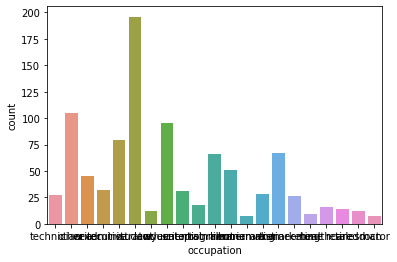

In [33]:
#distplot occupation

print(users['occupation'])

sns.countplot(users['occupation'])
#sns.distplot(users['occupation'], kde=False, rug=True);

In [34]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [35]:
#your answers here

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

       movie id movie title release date  unknown  Action  Adventure  \
0             1  Toy Story   01-Jan-1995      0.0     0.0        0.0   
1             1  Toy Story   01-Jan-1995      0.0     0.0        0.0   
2             1  Toy Story   01-Jan-1995      0.0     0.0        0.0   
3             1  Toy Story   01-Jan-1995      0.0     0.0        0.0   
4             1  Toy Story   01-Jan-1995      0.0     0.0        0.0   
...         ...         ...          ...      ...     ...        ...   
99995       267         NaN          NaN      NaN     NaN        NaN   
99996       267         NaN          NaN      NaN     NaN        NaN   
99997       267         NaN          NaN      NaN     NaN        NaN   
99998       267         NaN          NaN      NaN     NaN        NaN   
99999      1373         NaN          NaN      NaN     NaN        NaN   

       Animation  Childrens  Comedy  Crime  ...  Sci-Fi  Thriller  War  \
0            1.0        1.0     1.0    0.0  ...     0.0      

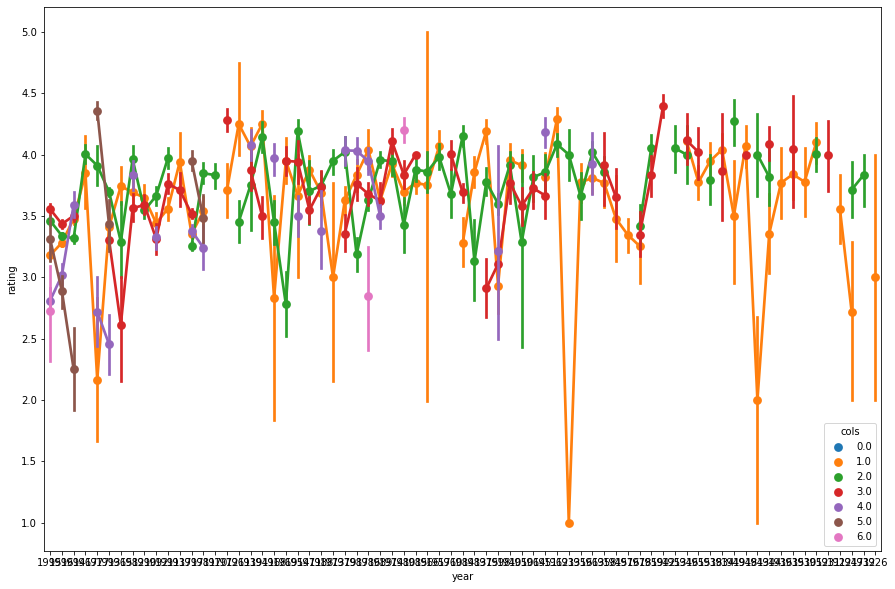

In [36]:
#Your answer here

rm=pd.merge(movies,ratings,how='right',on='movie id')
print(rm)
print(rm.columns)

#rm['genre']=list(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
cols=list(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
rm["cols"]=rm[cols].sum(axis=1)

plt.figure(figsize=(15,10))
sns.pointplot(x="year", y="rating", hue='cols' ,  data=rm)
plt.show()




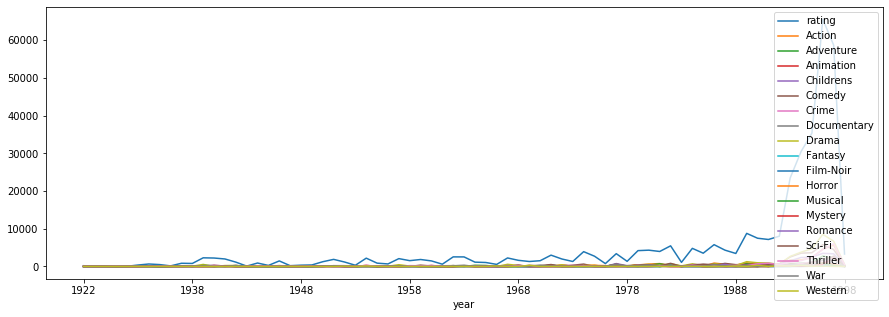

In [37]:
rm[['year','rating','Action','Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [38]:

topratings = rm.groupby('movie title').size().reset_index(name='count')
topratings.loc[topratings['count'] > 100]


,movie title,count
2,101 Dalmatians,109
3,12 Angry Men,125
7,2001: A Space Odyssey,259
15,Absolute Power,127
16,"Abyss, The",151
...,...,...
1627,Willy Wonka and the Chocolate Factory,326
1638,"Wizard of Oz, The",246
1646,"Wrong Trousers, The",118
1651,Young Frankenstein,200


In [39]:
rating_summary=rm.groupby(['movie title'])['rating'].mean().sort_values(ascending=False).reset_index(name='mean')
rating_summary



,movie title,mean
0,"Saint of Fort Washington, The",5.0
1,Entertaining Angels: The Dorothy Day Story,5.0
2,Aiqing wansui,5.0
3,Santa with Muscles,5.0
4,Prefontaine,5.0
...,...,...
1652,Tigrero: A Film That Was Never Made,1.0
1653,"Low Life, The",1.0
1654,Pharaoh's Army,1.0
1655,To Cross the Rubicon,1.0


In [40]:
topmovies = topratings['movie title'].isin(rating_summary)
topmovies = rm.groupby(['movie title'])['rating'].count().sort_values(ascending=False).reset_index(name='count').head(25)
topmovies

,movie title,count
0,Star Wars,583
1,Contact,509
2,Fargo,508
3,Return of the Jedi,507
4,Liar Liar,485
5,"English Patient, The",481
6,Scream,478
7,Toy Story,452
8,Air Force One,431
9,Independence Day (ID4),429


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:

